### Plot EAI
Here, we define a stand-alone function for plotting the EAI from the CCDR notebook.

In [10]:
sns.color_palette('muted', 6)
# blue, orange, green, red, purple, brown

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882)]

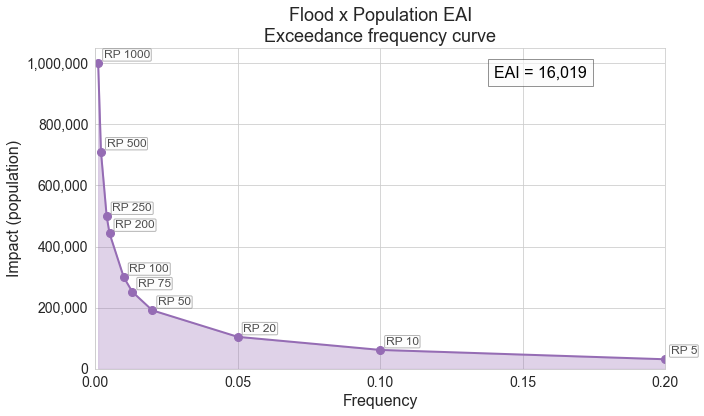

In [17]:
# ... (previous imports and data loading remain the same)

# Set a base font size
base_font_size = 14
plt.rcParams.update({'font.size': base_font_size})

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size
ax.plot(x, y, color=plt_color, lw=2, marker="o", markersize=8)  # Increased line width and marker size
ax.fill_between(x, 0, y, alpha=.3, color=plt_color)
ax.set(xlim=(0, max(x)), ylim=(0, max(y)*1.05), xticks=np.linspace(0, max(x), 5))
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel(xlbl, fontsize=base_font_size+2)
ax.set_ylabel(ylbl, fontsize=base_font_size+2)
ax.set_title(str(title+'\n'+subtitle), fontsize=base_font_size+4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=base_font_size)

if yOnRight:
    ax.invert_xaxis()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')

if xFreqAsRP:
    rp_lbl = dfData[['RP']].values.squeeze().tolist()
    rp_lbl = ['RP '+str(item) for item in rp_lbl]
    if yOnRight: x = max(x)-x
    for i in range(len(rp_lbl)):
        ax.text(x[i]/max(x)+x_offset, y[i]/(max(y)*1.05)+y_offset, rp_lbl[i], color='#4D4D4D',
                ha='left', va='bottom', transform=ax.transAxes, 
                bbox=dict(facecolor='#FAFAFA', edgecolor='#4D4D4D', boxstyle='round,pad=0.1', alpha=0.4),
                fontsize=base_font_size-2)  # Slightly smaller font for RP labels

if txtTotal:
    vtext = 'EAI = '+'{:,}'.format(totEAI)
    if yOnRight: xpos = 0.04
    ax.text(xpos, 0.9, vtext, fontsize=base_font_size+2, color='black',
            ha='left', va='bottom', transform=ax.transAxes, 
            bbox=dict(facecolor='#FAFAFA', edgecolor='#4D4D4D', boxstyle='square,pad=0.4', alpha=0.6))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the graph
plt.show()